

SDI 

In [ ]:
mask = np.ones_like(cube[0,0])
mask = mask_circle(mask, int(0.16/plsc))

opt_scal_mean, opt_flux = find_scal_vector(np.mean(cube,axis=1), lbda, flux_st, 
                                           mask=mask, nfp=2, fm="stddev")

In [ ]:
med_SDI_opt = median_sub(cube_fc, derot_angles, scale_list=opt_scal_med, flux_sc_list=opt_flux_med, sdi_only=True,
                         radius_int=mask_px, interp_zeros=True, mask_val=0)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2022-05-04 18:48:09
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
39 spectral channels per IFS frame
First median subtraction exploiting spectral variability
Running time:  0:00:17.223937
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
55 ADI frames
Median subtraction in the ADI fashion
Done derotating and combining
Running time:  0:00:19.351697
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


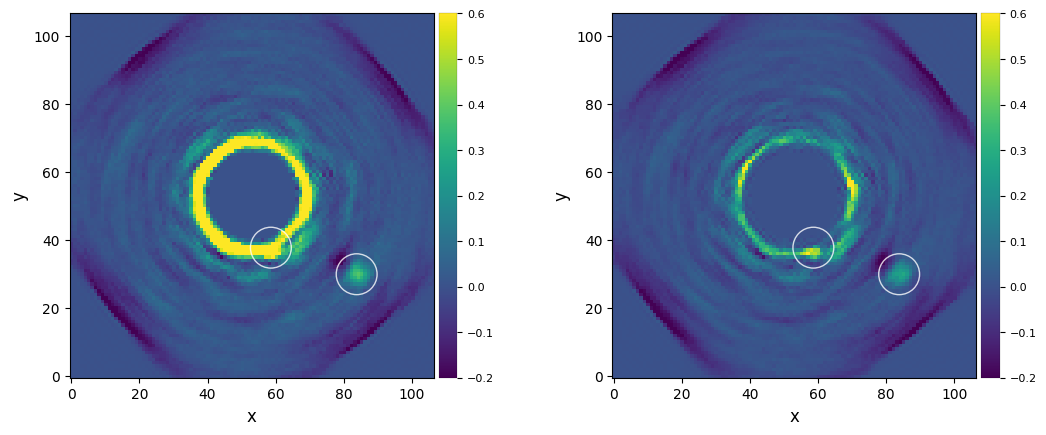

In [ ]:
%matplotlib inline
plot_frames((med_SDI, med_SDI_opt), circle=(xy_b,xy_c), vmin=-0.2, vmax=0.6)

Dimension PCA

In [ ]:
ncomp_sdi = 1
mask_px = int(0.1/plsc)

pca_sdi = pca(cube_fc, derot_angles, scale_list=opt_scal_med, ncomp=(ncomp_sdi,None), 
              adimsdi='double', crop_ifs=False, imlib='opencv', 
              interp_zeros=True, mask_val=0, mask_center_px=mask_px)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2022-05-04 18:48:28
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
System total memory = 17.180 GB
System available memory = 0.938 GB
39 spectral channels in IFS cube
First PCA stage exploiting spectral variability
Running time:  0:00:16.624008
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
55 ADI frames
De-rotating and combining frames (skipping PCA)
Running time:  0:00:16.676963
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


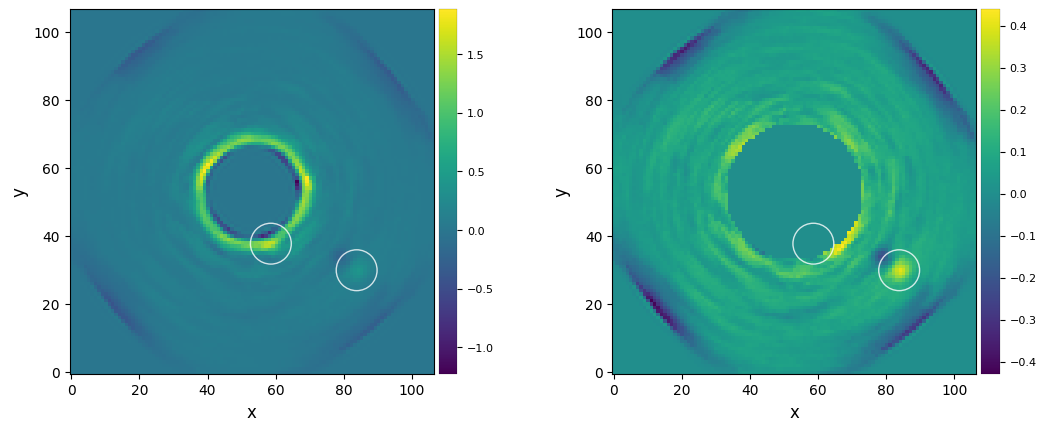

In [ ]:
%matplotlib inline
plot_frames((pca_sdi, mask_circle(pca_sdi,20)),
            circle=(xy_b,xy_c))